# Домашнее задание к лекции «Корреляция и корреляционный анализ»

In [2]:
import pandas as pd

In [23]:
df = pd.read_csv("water.csv", usecols=range(1,5))

In [24]:
df

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


### 1 Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

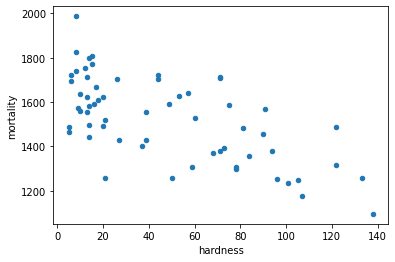

In [29]:
df.plot(kind='scatter', x='hardness', y='mortality')

По точечной диаграмме можно судить о том, что сущесвует обратная связь между жесткостью воды и средней годовой смертностью

In [30]:
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [31]:
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


Действительно, существует достаточно сильная отрицательная корреляция между жесткостью воды и среднегодовой смертностью

In [34]:
x = df[['hardness']]
y = df['mortality']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [39]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [40]:
model.coef_

array([-3.13167087])

Увеличение показателя жесткости водны на одну единицу измерения приводит к уменьшению смерности на 3.13 ед. измерения

In [41]:
model.intercept_

1668.9722977277095

In [42]:
y_pred = model.predict(x_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [43]:
model.score(x_test, y_test)

0.5046490611017092

In [44]:
model.score(x_train, y_train)

0.396789010091228

Неожиданно, но модель лучше себя показывает на тестовых данных. Около 50% вариации смертности объясняется нашей моделью

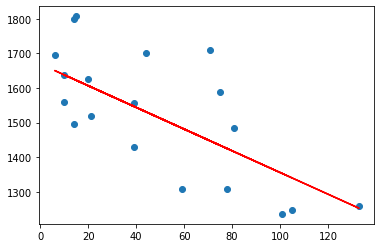

In [46]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

In [58]:
residuals = y_pred - y_test

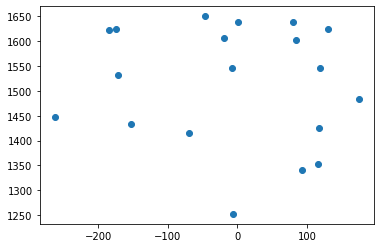

In [62]:
plt.scatter(residuals,y_pred)

Остатки сильно разбросаны 

(array([1., 2., 2., 0., 2., 3., 1., 2., 5., 1.]),
 array([-2.62376334e+02, -2.18618329e+02, -1.74860324e+02, -1.31102319e+02,
        -8.73443140e+01, -4.35863090e+01,  1.71696085e-01,  4.39297011e+01,
         8.76877062e+01,  1.31445711e+02,  1.75203716e+02]),
 <BarContainer object of 10 artists>)

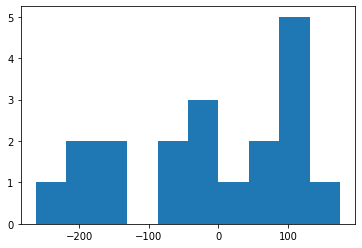

In [64]:
plt.hist(residuals)

Распределение остатков не похоже на нормальное

#### Вывод: Да, связь есть. Увеличение показателя жесткости водны на одну единицу измерения приводит к уменьшению смерности на 3.13 ед. измерения

### 2 Задание.
Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

In [96]:
df_south = df[df['location']=='South']

In [70]:
df_north = df[df['location']=='North']

#### Изучаем общую связь между смертностью и жесткостью воды в южных и северных штатах

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

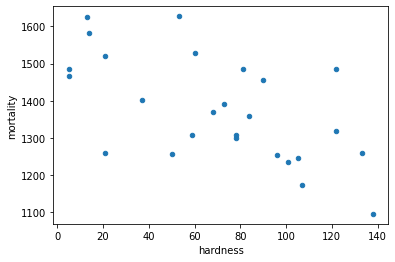

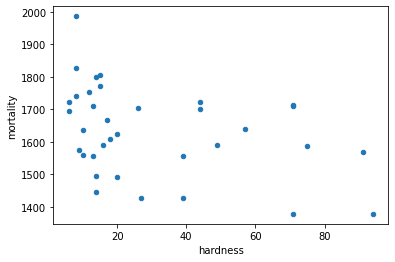

In [71]:
df_south.plot(kind='scatter', x='hardness', y='mortality')
df_north.plot(kind='scatter', x='hardness', y='mortality')

In [73]:
df_south[['hardness', 'mortality']].corr()


,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [74]:
df_north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


В двух группах штатав есть обратная связь между показателями жесткости воды и смертности. При этом в южных штатах данная связь почти в два раза сильнее. 

#### Строим регрессию для южных штатов

In [ ]:
x = df_south[['hardness']]
y = df_south['mortality']

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [85]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [86]:
model.coef_

array([-3.51342921])

значение коэффициента очень близко к значению коэффициента в общей регрессии

In [87]:
model.score(x_train, y_train)

0.6363808308877192

In [88]:
y_pred = model.predict(x_test)
y_pred

array([1211.58209643, 1622.65331428, 1271.31039304, 1211.58209643,
       1510.22357948, 1566.43844688, 1432.92813681, 1622.65331428])

In [89]:
model.score(x_test, y_test)

-2.5519223012352077

Модель бесполезная

In [90]:
model.score(x_train, y_train)

0.6363808308877192

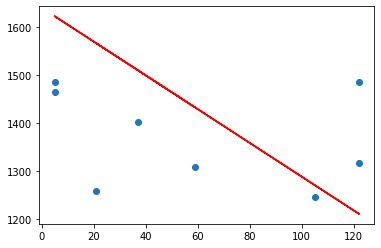

In [91]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

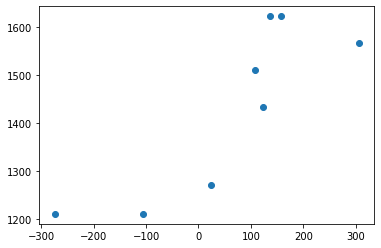

In [92]:
residuals = y_pred - y_test
plt.scatter(residuals,y_pred)

#### Строим регрессию для северных штатов

In [98]:
x = df_north[['hardness']]
y = df_north['mortality']

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [100]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [101]:
model.coef_

array([-1.97686226])

Значение отризательного коэффициента в 1,5 раза меньше, чем в общей регрессии

In [102]:
y_pred = model.predict(x_test)


In [103]:
model.score(x_test, y_test)

0.018885304285745863

Модель обладает слабым предсказательным потенциалом

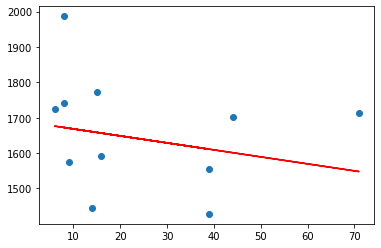

In [104]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='r')

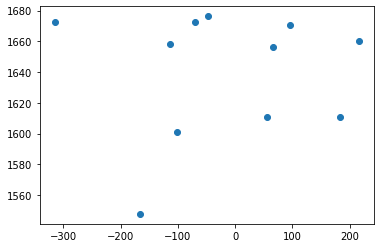

In [105]:
residuals = y_pred - y_test
plt.scatter(residuals,y_pred)

#### Вывод: По отдельности для северных и южных штатов подобная зависимость не сохранается. Вероятно, проблема возникает в связи с недостаточным размером выборки для обучения модели 